In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from ema_workbench import load_results


C:\Users\Dirk\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


In [2]:
filepath_results = r''

In [3]:
results = load_results('results_50scen_30_pol.gz.tar')

In [4]:
results

(      ABM_Heat-company-ROI  ABM_Max-capital-inv-share  \
 0                 0.137160                   0.069719   
 1                 0.062128                   0.102039   
 2                 0.064186                   0.045544   
 3                 0.127939                   0.120970   
 4                 0.112654                   0.080256   
 ...                    ...                        ...   
 1495              0.141684                   0.073563   
 1496              0.139523                   0.067502   
 1497              0.122250                   0.086174   
 1498              0.054213                   0.094968   
 1499              0.032264                   0.079638   
 
       ABM_Max-income-inv-share  ABM_Relative-construction-capacity  \
 0                     0.137245                            0.047283   
 1                     0.036129                            0.069331   
 2                     0.033345                            0.085324   
 3                

import pickle
a_file = open("test_2core_144exp.pkl", "rb")
results = pickle.load(a_file)
a_file.close()

In [5]:
list(results[1].keys())[:16]

['SD_Average Gas Price',
 'SD_Average Electricity Price',
 'SD_Average Heat Price',
 'SD_National Energy System Distribution[Natural Gas]',
 'SD_National Energy System Distribution[Green Gas]',
 'SD_National Energy System Distribution[LT Heating Grid]',
 'SD_National Energy System Distribution[MT Heating Grid]',
 'SD_National Energy System Distribution[HT Heating Grid]',
 'SD_National Energy System Distribution[Air Heat Pump]',
 'SD_National Energy System Distribution[Ground Heat Pump]',
 'SD_Cumulative CO2 emmissions',
 'SD_Percentage Renewable Electricity',
 'SD_CO2 Tax',
 'SD_Gas Trade[Natural Gas]',
 'SD_Gas Trade[Green Gas]',
 'SD_Electricity Trade']

In [6]:
global_results = {k: results[1][k] for k in list(results[1].keys())[:16]}

In [7]:
lst = []
for i in range (30):
    for j in range (50):
        lst.append(j)

In [8]:
results[0]['scenario'] = np.array(lst, dtype = object)

In [9]:
results_dict = {}
for i in global_results:
    x = global_results[i]
    x = x[~np.isnan(x).any(axis=1)]
    results_dict[i] = x
#remove typo
results_dict['SD_Cumulative CO2 emissions'] = results_dict.pop('SD_Cumulative CO2 emmissions')    
experiments_noNaN = results[0][~np.isnan(global_results['SD_Average Gas Price']).any(axis = 1)].reset_index(drop = True)

In [10]:
results_nan = {}
for i in global_results:
    x = global_results[i]
    x = x[np.isnan(x).any(axis=1)]
    results_nan[i] = x
#remove typo
results_nan['SD_Cumulative CO2 emissions'] = results_nan.pop('SD_Cumulative CO2 emmissions')    
experiments_NaN = results[0][np.isnan(global_results['SD_Average Gas Price']).any(axis = 1)].reset_index(drop = True)

In [11]:
results_error = (experiments_NaN,results_nan)

In [12]:
results_error

(   ABM_Heat-company-ROI  ABM_Max-capital-inv-share  ABM_Max-income-inv-share  \
 0              0.090487                   0.148221                  0.013464   
 1              0.106694                   0.023284                  0.130834   
 
    ABM_Relative-construction-capacity  ABM_group-behaviour  \
 0                            0.059717             0.958499   
 1                            0.093339             0.728303   
 
   ABM_heating-grid-cost-scenario  SD_Base Investments Renewable  \
 0                          "Low"                       0.098370   
 1                          "Low"                       0.118999   
 
    SD_Expected Amplitude  SD_Expected Period  SD_Foreign renewable multiplier  \
 0               0.044830            7.440051                         1.740506   
 1               0.021879            7.284475                         1.842354   
 
    ...  ABM_MT-investment-subsidy  ABM_MT-production-subsidy  \
 0  ...                   0.255462           

In [13]:
results[0][np.isnan(global_results['SD_Average Gas Price']).any(axis = 1)].iloc[:,16:]

ABM_LT-investment-subsidy  ABM_LT-production-subsidy  \
9                    0.454161                   0.103737   
33                   0.454161                   0.103737   

    ABM_MT-investment-subsidy  ABM_MT-production-subsidy  \
9                    0.255462                   0.179799   
33                   0.255462                   0.179799   

    ABM_insulation-subsidy SD_CO2 tax scheme SD_Green gas transition scheme  \
9                 0.076029                 1                              1   
33                0.076029                 1                              1   

    SD_NMTU factor  SD_Tax multiplier scenario policy                  model  
9         1.637719           2.955802        9      0  UrbanEnergyTransition  
33        1.637719           2.955802       33      0  UrbanEnergyTransition

In [14]:
results[0].head(50).iloc[:,:16].describe().loc[['min','max']]

ABM_Heat-company-ROI  ABM_Max-capital-inv-share  \
min              0.032264                   0.011406   
max              0.149881                   0.148221   

     ABM_Max-income-inv-share  ABM_Relative-construction-capacity  \
min                  0.011422                            0.010713   
max                  0.148934                            0.099424   

     ABM_group-behaviour  SD_Base Investments Renewable  \
min             0.004778                       0.026847   
max             0.983405                       0.123991   

     SD_Expected Amplitude  SD_Expected Period  \
min               0.010766            4.041938   
max               0.049248            9.964325   

     SD_Foreign renewable multiplier  SD_Gas production cost ramp[Green Gas]  \
min                         0.520070                               -0.000989   
max                         1.971127                                0.000968   

     SD_Gas production cost ramp[Natural Gas]  SD_Green Gas investments  \
min                                 -0.000994              1.053685e+08   
max                                  0.000974              3.956352e+08   

     SD_Grey electricity cost ramp  SD_Maximum cost reduction  \
min                      -0.000996                   0.105131   
max                       0.000972                   0.492085   

     SD_Renewable Electricity cost multiplier  
min                                  0.511503  
max                                  1.978933

In [15]:
results_clean = (experiments_noNaN,results_dict)

In [16]:
titles = {'SD_Average Gas Price':'Gas Price (€ / M³)',
 'SD_Average Electricity Price':'Electricity Price (€ / kWh)',
 'SD_Average Heat Price':'Heat Price (€ / GJ)',
 'SD_National Energy System Distribution[Natural Gas]':'Natural Gas',
 'SD_National Energy System Distribution[Green Gas]':'Green Gas',
 'SD_National Energy System Distribution[LT Heating Grid]':'LT Heating Grid',
 'SD_National Energy System Distribution[MT Heating Grid]':'MT Heating Grid',
 'SD_National Energy System Distribution[HT Heating Grid]':'HT Heating Grid',
 'SD_National Energy System Distribution[Air Heat Pump]':'Air Heat Pump',
 'SD_National Energy System Distribution[Ground Heat Pump]':'Ground Heat Pump',
 'SD_Cumulative CO2 emissions': 'Cumulative CO2 emissions (kg)',
 'SD_Percentage Renewable Electricity': 'Percentage Renewable Electricity',
 'SD_CO2 Tax':'CO2 Tax (€ / kg)',
 'SD_Gas Trade[Natural Gas]':'Natural Gas Trade (M³ / Year)',
 'SD_Gas Trade[Green Gas]': 'Green Gas Trade (M³ / Year)',
 'SD_Electricity Trade': 'Electricity Trade (kWh / Year)'}

In [17]:
time_array = np.array([[]])
for i in range(1498):
    time_array = np.append(time_array, np.array(range(2020,2061)))
results_clean[1]['TIME'] = time_array.reshape(1498,41)

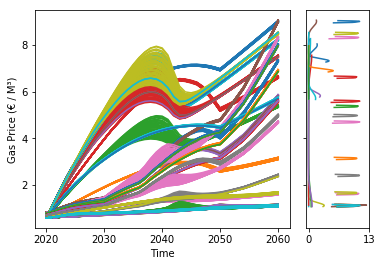

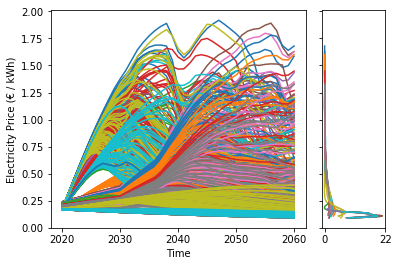

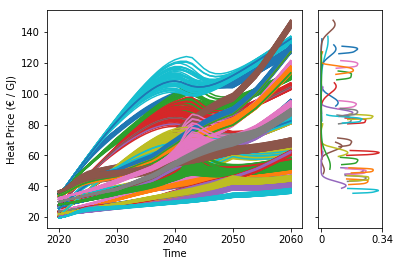

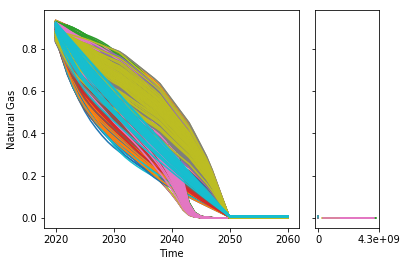

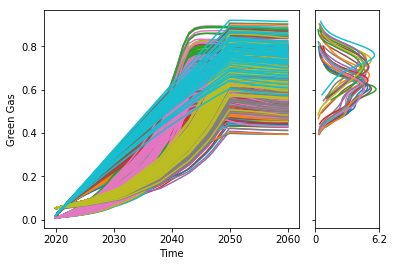

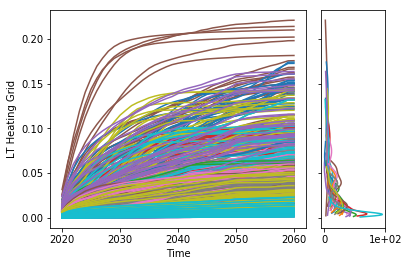

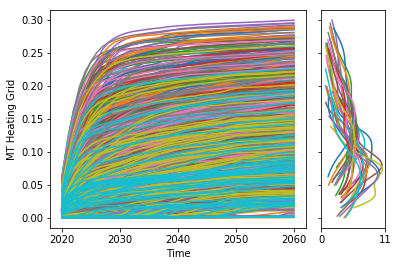

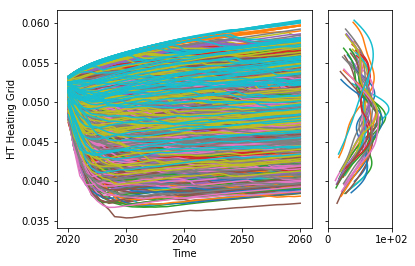

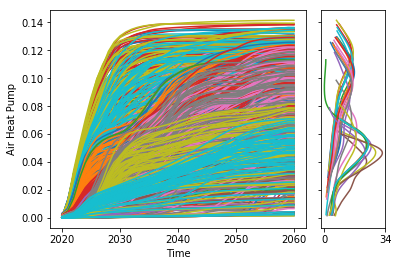

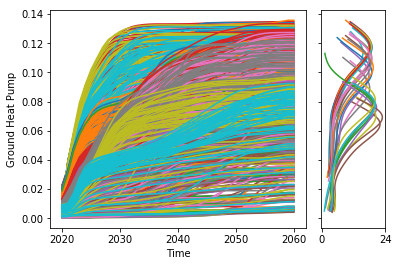

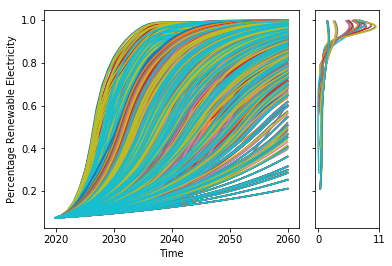

singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix
singular matrix


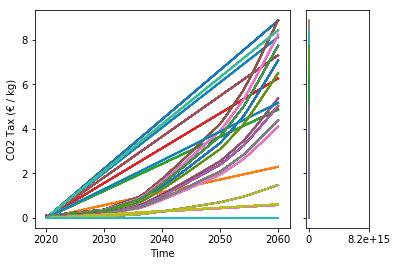

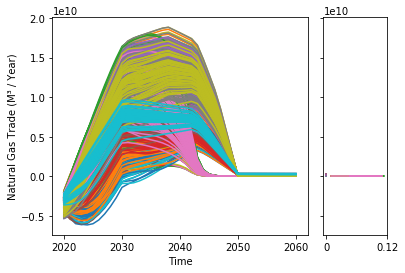

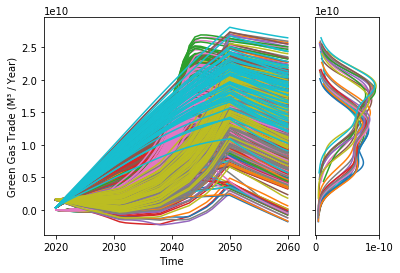

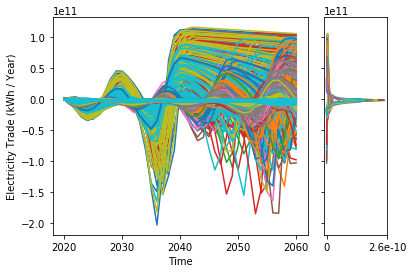

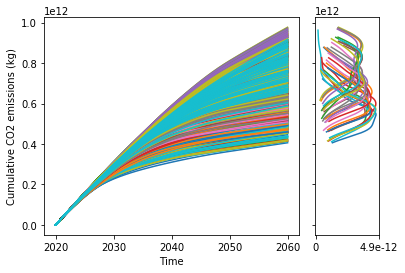

KeyError: 'TIME'

In [25]:
from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis.plotting_util import Density

for i in results_clean[1].keys():

    figure = lines(results_clean[0], results_clean[1], group_by = 'policy', titles = None, ylabels=titles, outcomes_to_show = i, density = Density.KDE, legend = False ) #show lines, and end state density
    plt.show()

In [18]:
from ema_workbench.analysis import clusterer as cl

C:\Users\Dirk\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Dirk\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Dirk\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [19]:
distances = {}
for i in results_clean[1].keys():
    distances[i] = cl.calculate_cid(results_clean[1][i])


C:\Users\Dirk\Anaconda3\lib\site-packages\ema_workbench\analysis\clusterer.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  return np.linalg.norm(xi - xj) * (max(ce_i, ce_j) / min(ce_i, ce_j))
C:\Users\Dirk\Anaconda3\lib\site-packages\ema_workbench\analysis\clusterer.py:30: RuntimeWarning: invalid value encountered in double_scalars
  return np.linalg.norm(xi - xj) * (max(ce_i, ce_j) / min(ce_i, ce_j))


In [15]:
# for i in distances.keys():
#     print(i)
#     figure = cl.plot_dendrogram(distances[i])
#     plt.show(figure)

In [16]:
# for i in ['SD_Gas Trade[Natural Gas]', 'SD_Gas Trade[Green Gas]', 'SD_Electricity Trade']:
#     print(i)
#     figure = cl.plot_dendrogram(distances[i])
#     plt.show(figure)

In [20]:
results_clean[0]['g-price cluster'] = np.array(cl.apply_agglomerative_clustering(distances['SD_Average Gas Price'], 5), dtype = object)
results_clean[0]['e-price cluster'] = np.array(cl.apply_agglomerative_clustering(distances['SD_Average Electricity Price'], 5), dtype = object)
results_clean[0]['h-price cluster'] = np.array(cl.apply_agglomerative_clustering(distances['SD_Average Heat Price'], 5), dtype = object)
results_clean[0]['GG cluster'] = np.array(cl.apply_agglomerative_clustering(distances['SD_National Energy System Distribution[Green Gas]'], 4), dtype = object)
results_clean[0]['AGP cluster'] = np.array(cl.apply_agglomerative_clustering(distances['SD_National Energy System Distribution[Air Heat Pump]'], 5), dtype = object)
results_clean[0]['GHP cluster'] = np.array(cl.apply_agglomerative_clustering(distances['SD_National Energy System Distribution[Ground Heat Pump]'], 5), dtype = object)
results_clean[0]['MT cluster'] = np.array(cl.apply_agglomerative_clustering(distances['SD_National Energy System Distribution[MT Heating Grid]'], 4), dtype = object)
results_clean[0]['LT cluster'] = np.array(cl.apply_agglomerative_clustering(distances['SD_National Energy System Distribution[LT Heating Grid]'], 5), dtype = object)
results_clean[0]['CO2 cluster'] = np.array(cl.apply_agglomerative_clustering(distances['SD_Cumulative CO2 emissions'], 2), dtype = object)


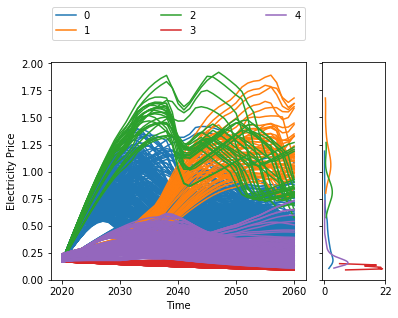

In [248]:
figure = lines(results_clean[0], results_clean[1], titles = None, ylabels=titles, outcomes_to_show ='SD_Average Electricity Price', group_by = 'e-price cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

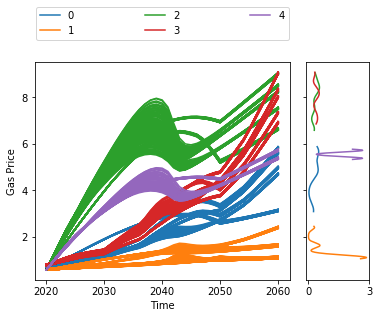

In [249]:
figure = lines(results_clean[0], results_clean[1],titles = None, ylabels=titles,  outcomes_to_show ='SD_Average Gas Price', group_by = 'g-price cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

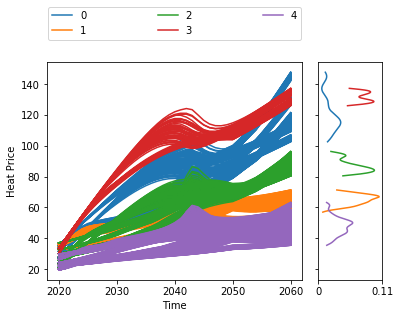

In [250]:
figure = lines(results_clean[0], results_clean[1],titles = None, ylabels=titles,  outcomes_to_show ='SD_Average Heat Price', group_by = 'h-price cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

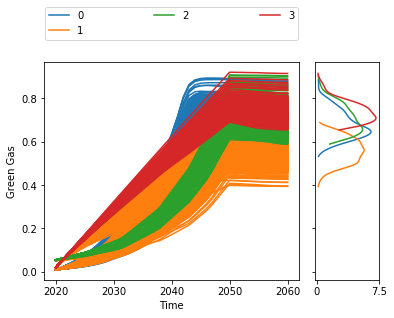

In [251]:
figure = lines(results_clean[0], results_clean[1],titles = None, ylabels=titles,  outcomes_to_show ='SD_National Energy System Distribution[Green Gas]', group_by = 'GG cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

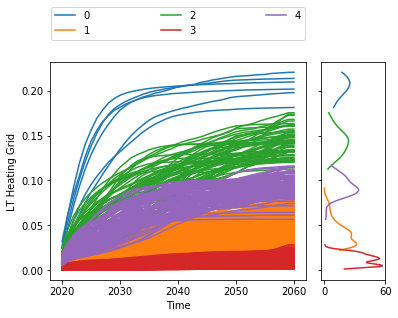

In [252]:
figure = lines(results_clean[0], results_clean[1],titles = None, ylabels=titles,  outcomes_to_show ='SD_National Energy System Distribution[LT Heating Grid]', group_by = 'LT cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

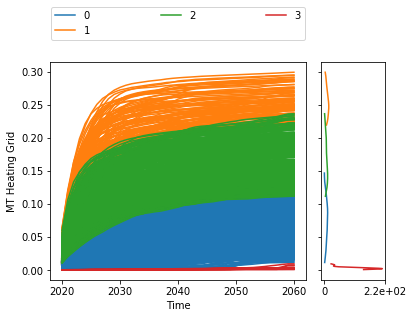

In [253]:
figure = lines(results_clean[0], results_clean[1], titles = None, ylabels=titles, outcomes_to_show ='SD_National Energy System Distribution[MT Heating Grid]', group_by = 'MT cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

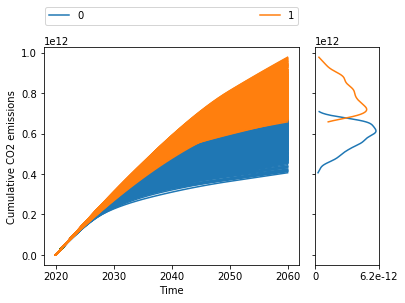

In [254]:
figure = lines(results_clean[0], results_clean[1], titles = None, ylabels=titles, outcomes_to_show ='SD_Cumulative CO2 emissions', group_by = 'CO2 cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

In [255]:
figure = lines(results_clean[0], results_clean[1], titles = None, ylabels=titles, outcomes_to_show ='SD_Green Gas Trade', group_by = 'CO2 cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

KeyError: 'SD_Green Gas Trade'

In [25]:
# Cluster clusterer

In [26]:
clusters = cl.calculate_cid(results_clean[0].iloc[:,28:].to_numpy().astype(float))

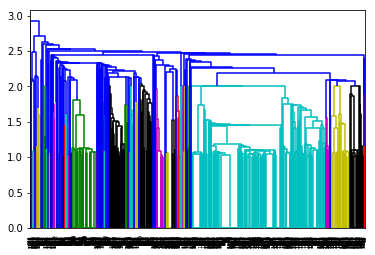

In [27]:
figure = cl.plot_dendrogram(clusters)
plt.show(figure)

In [28]:
results_clean[0]['cluster cluster'] = np.array(cl.apply_agglomerative_clustering(clusters,4), dtype = object)

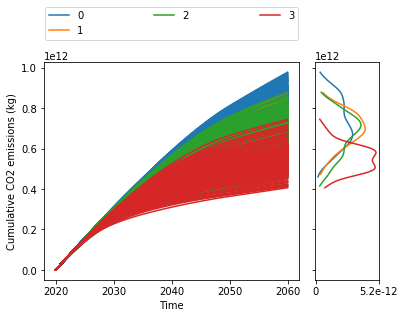

In [257]:
figure = lines(results_clean[0], results_clean[1],titles = None, ylabels=titles,  outcomes_to_show ='SD_Cumulative CO2 emissions', group_by = 'cluster cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

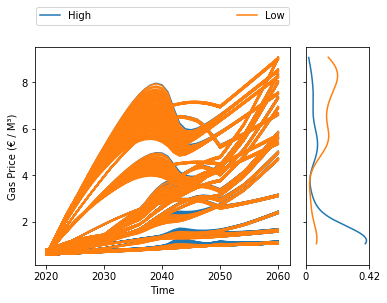

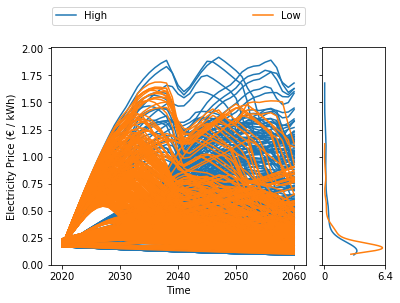

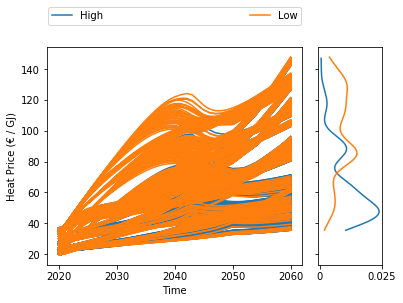

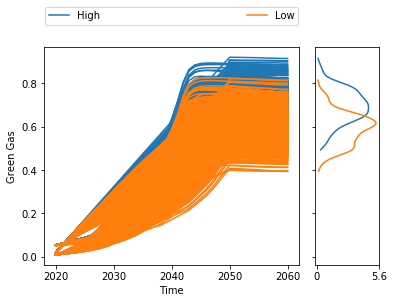

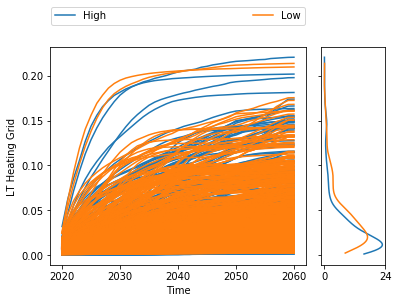

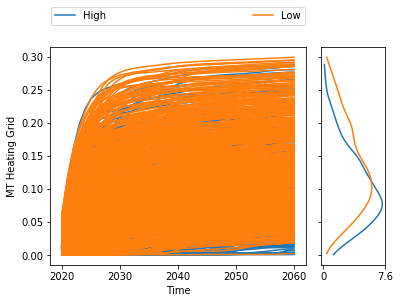

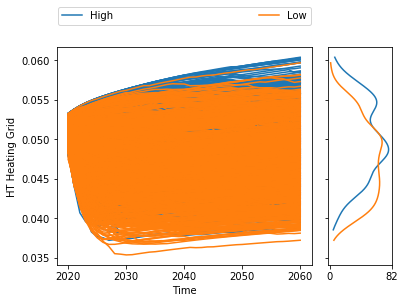

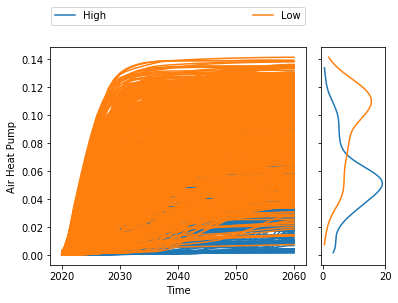

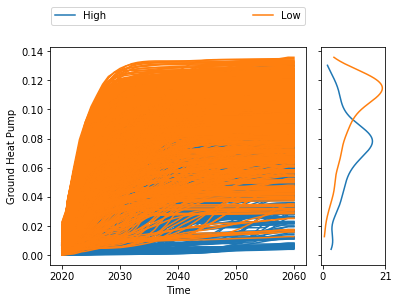

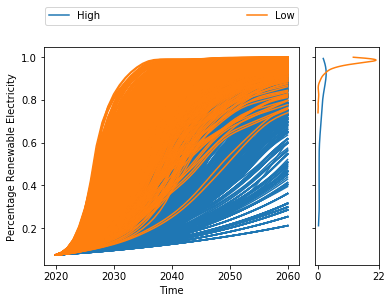

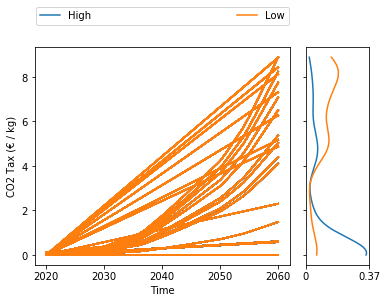

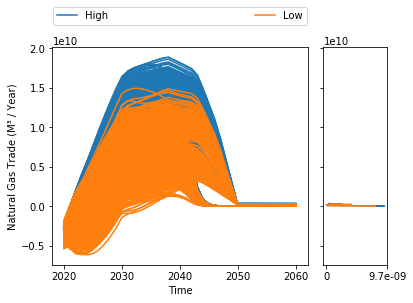

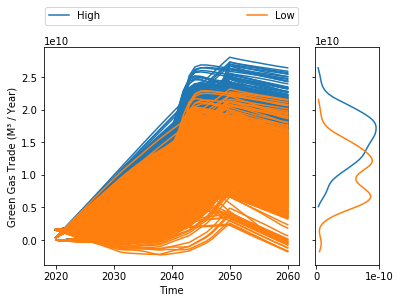

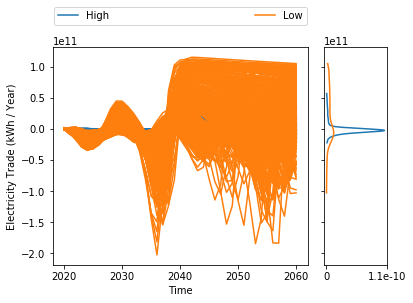

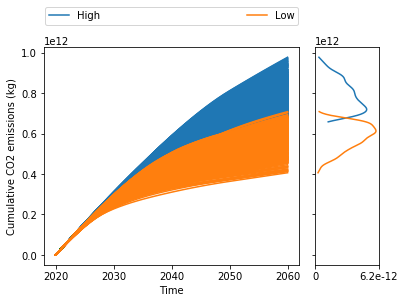

KeyError: 'TIME'

In [259]:
for i in results_clean[1].keys():

    figure = lines(results_clean[0], results_clean[1], group_by = 'CO2 goal', titles = None, ylabels=titles, outcomes_to_show = i, density = Density.KDE, legend = True) #show lines, and end state density
    plt.show()

In [21]:
systems_grouped = {}
systems_grouped['Gas Connections'] = results_clean[1]['SD_National Energy System Distribution[Natural Gas]'] + results_clean[1]['SD_National Energy System Distribution[Green Gas]']
systems_grouped['Heating Grids'] = results_clean[1]['SD_National Energy System Distribution[HT Heating Grid]'] + results_clean[1]['SD_National Energy System Distribution[MT Heating Grid]']+ results_clean[1]['SD_National Energy System Distribution[LT Heating Grid]']
systems_grouped['Heat Pumps'] = results_clean[1]['SD_National Energy System Distribution[Air Heat Pump]'] + results_clean[1]['SD_National Energy System Distribution[Ground Heat Pump]']
systems_grouped['Renewable Electricity'] = results_clean[1]['SD_Percentage Renewable Electricity']
systems_grouped['TIME'] = time_array.reshape(1498,41)

In [22]:
results_clean[0]['CO2 goal'] = results_clean[0]['CO2 cluster'].map(dict({0: "Low", 1: "High"})).astype(object)

In [23]:
time_array

array([2020., 2021., 2022., ..., 2058., 2059., 2060.])

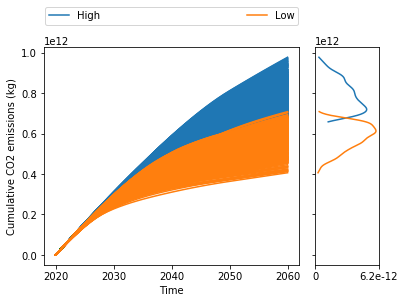

In [26]:
figure = lines(results_clean[0], results_clean[1],titles = None, ylabels=titles,  outcomes_to_show ='SD_Cumulative CO2 emissions', group_by = 'CO2 goal', density = Density.KDE, legend = True ) #show lines, and end state density
plt.show()

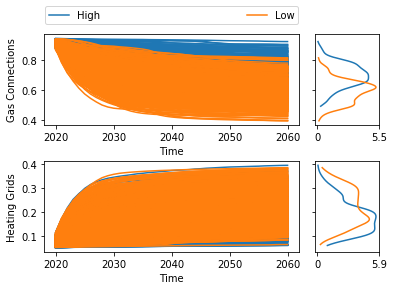

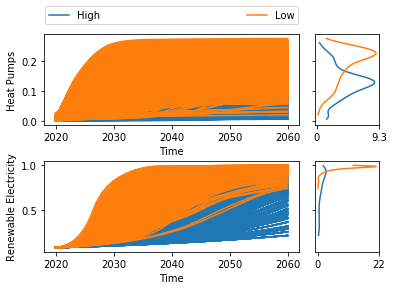

In [27]:
ax1 = lines(results_clean[0], systems_grouped, group_by = 'CO2 goal', titles = None, outcomes_to_show = list(systems_grouped.keys())[0:2], density = Density.KDE, legend = True) #show lines, and end state density
ax2 = lines(results_clean[0], systems_grouped, group_by = 'CO2 goal', titles = None, outcomes_to_show = list(systems_grouped.keys())[2:4], density = Density.KDE, legend = True)


In [28]:
systems_grouped['Cumulative CO2 Emissions'] = results_clean[1]['SD_Cumulative CO2 emissions']
distances = {}
for i in systems_grouped.keys():
    distances[i] = cl.calculate_cid(systems_grouped[i])


In [29]:
# for i in distances.keys():
#     print(i)
#     figure = cl.plot_dendrogram(distances[i])
#     plt.show(figure)

In [30]:
results_clean[0]['hp cluster'] = np.array(cl.apply_agglomerative_clustering(distances['Heat Pumps'], 5), dtype = object)
results_clean[0]['hg cluster'] = np.array(cl.apply_agglomerative_clustering(distances['Heating Grids'], 5), dtype = object)
results_clean[0]['CO2 cluster'] = np.array(cl.apply_agglomerative_clustering(distances['Cumulative CO2 Emissions'], 5), dtype = object)

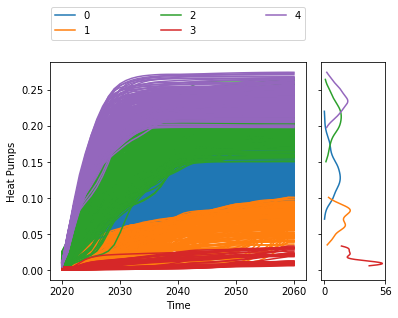

In [31]:
figure = lines(results_clean[0], systems_grouped,titles = None,  outcomes_to_show ='Heat Pumps', group_by = 'hp cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

In [32]:
results_clean[0]['hp cluster'].value_counts()

0    687
2    361
4    197
1    192
3     61
Name: hp cluster, dtype: int64

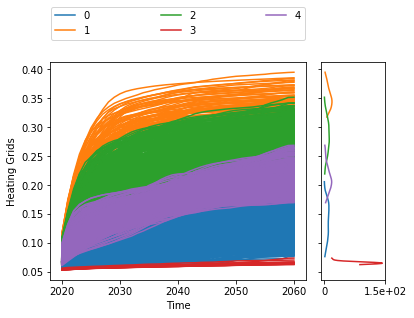

In [33]:
figure = lines(results_clean[0], systems_grouped,titles = None, outcomes_to_show ='Heating Grids', group_by = 'hg cluster', density = Density.KDE ) #show lines, and end state density
plt.show()

In [34]:
results_clean[0]['hg cluster'].value_counts()

0    658
4    401
2    362
1     63
3     14
Name: hg cluster, dtype: int64

In [35]:
# figure = lines(results_clean[0], systems_grouped,titles = None, outcomes_to_show ='Cumulative CO2 Emissions', group_by = 'CO2 cluster', density = Density.KDE ) #show lines, and end state density
# plt.show()

In [36]:
results_clean[0]['Scenario CO2 high'] = (results_clean[0]['CO2 cluster'] == 1)
results_clean[0]['Scenario CO2 low'] = (results_clean[0]['CO2 cluster'] == 4) | (results_clean[0]['CO2 cluster'] == 2)
results_clean[0]['Scenario HG high'] = (results_clean[0]['hg cluster'] == 1) | (results_clean[0]['hg cluster'] == 2)
results_clean[0]['Scenario HP high'] = results_clean[0]['hp cluster'] == 4

In [37]:
scenarios = results_clean[0].iloc[:,-4:]

In [38]:
scenarios.to_csv('Scenarios.csv')

In [39]:
results_clean[0]['Scenario HG high'].value_counts()

False    1073
True      425
Name: Scenario HG high, dtype: int64

In [40]:
results_clean[0]['CO2 cluster'].value_counts()

0    549
3    477
1    318
2    136
4     18
Name: CO2 cluster, dtype: int64

In [41]:
results_clean[0]['hg cluster'].value_counts()

0    658
4    401
2    362
1     63
3     14
Name: hg cluster, dtype: int64

In [42]:
policies = results_clean[0].iloc[:,16:25].drop('SD_Green gas transition scheme', axis = 1)
uncertainties = results_clean[0].iloc[:,:16]
inputs = results_clean[0].iloc[:,:25]

In [43]:
import mpld3
from ema_workbench.analysis import prim, feature_scoring

In [44]:
inputs.columns = inputs.columns.str.strip('ABM').str.strip('SD').str.strip('_').str.replace('-', ' ')
policies.columns = policies.columns.str.strip('ABM').str.strip('SD').str.strip('_').str.replace('-', ' ')
uncertainties.columns = uncertainties.columns.str.strip('ABM').str.strip('SD').str.strip('_').str.replace('-', ' ')

In [45]:
inputs

Heat company ROI  Max capital inv share  Max income inv share  \
0             0.137160               0.069719              0.137245   
1             0.062128               0.102039              0.036129   
2             0.064186               0.045544              0.033345   
3             0.127939               0.120970              0.100692   
4             0.112654               0.080256              0.119781   
...                ...                    ...                   ...   
1493          0.141684               0.073563              0.067290   
1494          0.139523               0.067502              0.102829   
1495          0.122250               0.086174              0.026246   
1496          0.054213               0.094968              0.098449   
1497          0.032264               0.079638              0.047233   

      Relative construction capacity  group behaviour  \
0                           0.047283         0.499179   
1                           0.069331         0.107199   
2                           0.085324         0.267829   
3                           0.070322         0.624889   
4                           0.066683         0.846891   
...                              ...              ...   
1493                        0.048473         0.571133   
1494                        0.037726         0.779493   
1495                        0.054436         0.293478   
1496                        0.057664         0.463579   
1497                        0.085909         0.798667   

     heating grid cost scenario  Base Investments Renewable  \
0                        "High"                    0.052367   
1                        "High"                    0.101651   
2                         "Low"                    0.033199   
3                         "Low"                    0.059333   
4                         "Low"                    0.104178   
...                         ...                         ...   
1493                     "High"                    0.079585   
1494                     "High"                    0.068916   
1495                      "Low"                    0.111380   
1496                      "Low"                    0.090362   
1497                     "High"                    0.032138   

      Expected Amplitude  Expected Period  Foreign renewable multiplier  ...  \
0               0.010766         6.502617                      0.520070  ...   
1               0.046696         7.843181                      0.714493  ...   
2               0.048046         6.214144                      1.700626  ...   
3               0.039061         7.077304                      1.007715  ...   
4               0.048446         4.501719                      1.382993  ...   
...                  ...              ...                           ...  ...   
1493            0.021174         6.792231                      1.152620  ...   
1494            0.032619         8.854697                      1.290761  ...   
1495            0.045565         4.708249                      0.936294  ...   
1496            0.014600         9.405961                      0.563824  ...   
1497            0.037910         5.625396                      1.616193  ...   

      Renewable Electricity cost multiplier  LT investment subsidy  \
0                                  1.434229               0.454161   
1                                  1.834640               0.454161   
2                                  1.270023               0.454161   
3                                  0.958381               0.454161   
4                                  0.540079               0.454161   
...                                     ...                    ...   
1493                               1.367996               0.055966   
1494                               0.571011               0.055966   
1495                               1.371065               0.055966   
1496                               1.540364       

In [46]:
# cluster prim
x = inputs
#y = results_clean[0]['cluster cluster'].isin([2, 3])
#y = results_clean[0]['CO2 cluster'].isin([0])
y = results_clean[0]['CO2 goal'] == 'Low'
prim_alg = prim.Prim(x, y, peel_alpha = 0.15, threshold=0.8)
box1 = prim_alg.find_box()

In [47]:
(results_clean[0]['CO2 cluster'].isin([0]) * 1).sum()

549

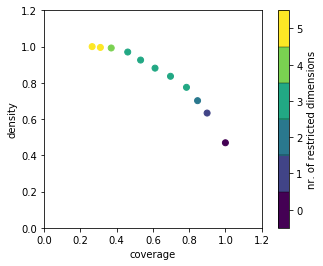

In [48]:
box1.show_tradeoff()
plt.show()

coverage    0.785206
density     0.775281
id                 3
mass          0.4753
mean        0.775281
res_dim            3
Name: 3, dtype: object

                                box 3                                         
                                  min       max                      qp values
CO2 tax scheme                 {1, 2}    {1, 2}  [3.270272707396298e-23, -1.0]
Base Investments Renewable  0.0407028  0.123991  [6.400205170571691e-06, -1.0]
Tax multiplier               0.591914    2.9558  [8.752318484324952e-06, -1.0]



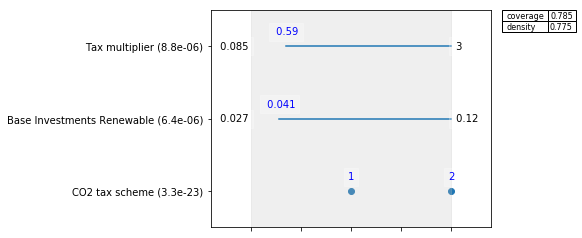

In [49]:
box1.inspect(3)
box1.inspect(3, style='graph')
plt.show()

CO2 tax scheme [1, 2, 0]


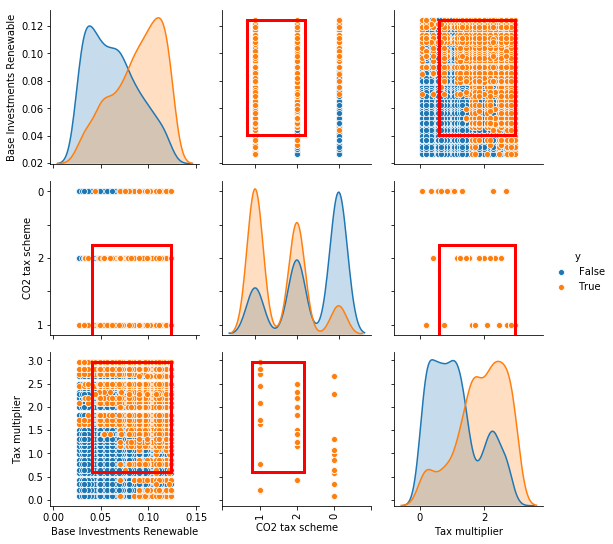

In [50]:
box1.show_pairs_scatter(3)
plt.show()

In [51]:
x = inputs
y = results_clean[0]['CO2 cluster'].isin([1])

fs, alg = feature_scoring.get_ex_feature_scores(x, y)
fs.sort_values(ascending=False, by=1)

1
0                                              
Base Investments Renewable             0.221309
CO2 tax scheme                         0.166489
Tax multiplier                         0.077127
Green gas transition scheme            0.048498
LT investment subsidy                  0.033278
insulation subsidy                     0.032278
LT production subsidy                  0.029572
NMTU factor                            0.029280
MT investment subsidy                  0.029102
Max capital inv share                  0.026181
Foreign renewable multiplier           0.025289
MT production subsidy                  0.024242
Gas production cost ramp[Green Gas]    0.024179
Green Gas investments                  0.023094
Gas production cost ramp[Natural Gas]  0.023087
Relative construction capacity         0.022163
Renewable Electricity cost multiplier  0.020439
Max income inv share                   0.020183
Expected Period                        0.019669
Heat company ROI                       0.019610
group behaviour                        0.018809
Expected Amplitude                     0.017537
Grey electricity cost ramp             0.016919
heating grid cost scenario             0.016898
Maximum cost reduction                 0.014765

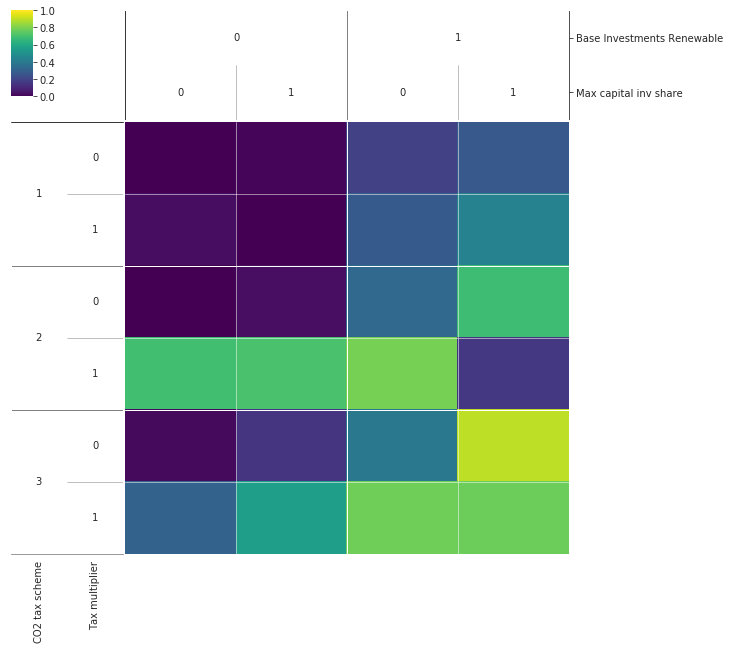

In [52]:
from ema_workbench.analysis import dimensional_stacking

x = inputs
#y = results_clean[0]['cluster cluster'].isin([2,3])
y = results_clean[0]['CO2 cluster'].isin([0])
#y = Extract_final(results_clean[1]['SD_National Energy System Distribution[Green Gas]']) < 0.55
#y = Extract_final(results_clean[1]['SD_Cumulative CO2 emissions']) <0.65e12
dimensional_stacking.create_pivot_plot(x, y, nr_levels = 2, nbins=2)
plt.show()

In [53]:
kpis = {}
kpis = {k: results_clean[1][k] for k in list(results_clean[1].keys())[3:11]}
kpis['SD_Cumulative CO2 emissions'] = results_clean[1]['SD_Cumulative CO2 emissions']


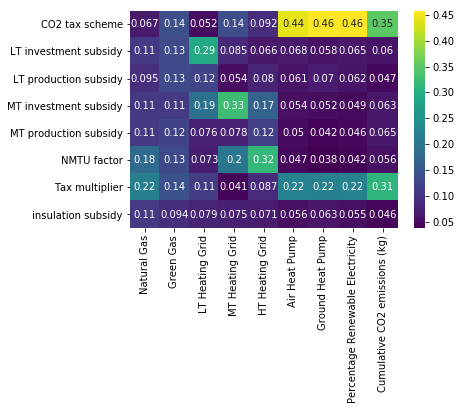

In [54]:
from ema_workbench.analysis import feature_scoring
import seaborn as sns

x = policies
y = kpis

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs.rename(columns = titles), cmap='viridis', annot=True)
plt.show()

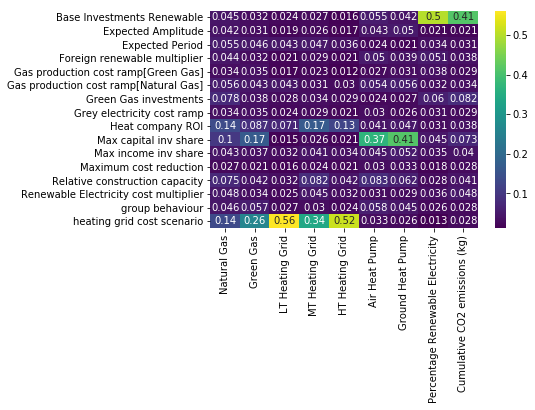

In [55]:
from ema_workbench.analysis import feature_scoring
import seaborn as sns

x = uncertainties
y = kpis

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs.rename(columns = titles), cmap='viridis', annot=True)
plt.show()

In [56]:
def Extract_final(lst): 
    return np.array([item[-1] for item in lst])

In [57]:
import mpld3
from ema_workbench.analysis import prim


In [58]:
x = inputs
#x = results_clean[0].iloc[:,:-8].drop('policy', axis = 1)
y = Extract_final(results_clean[1]['SD_National Energy System Distribution[Green Gas]']) < 0.55
prim_alg = prim.Prim(x, y, peel_alpha = 0.15, threshold=0.8)
box2 = prim_alg.find_box()

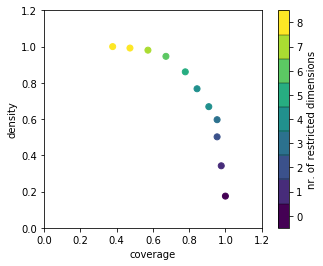

In [59]:
box2.show_tradeoff()
plt.show()

coverage    0.843511
density     0.767361
id                 5
mass        0.192256
mean        0.767361
res_dim            4
Name: 5, dtype: object

                                box 5                                         
                                  min       max                      qp values
heating grid cost scenario    {"Low"}   {"Low"}  [9.999929065930396e-41, -1.0]
CO2 tax scheme                 {1, 2}    {1, 2}  [4.635949925486798e-15, -1.0]
Max capital inv share       0.0518972  0.148221  [3.469929604010721e-13, -1.0]
Tax multiplier               0.591914    2.9558  [0.0016684415852974152, -1.0]



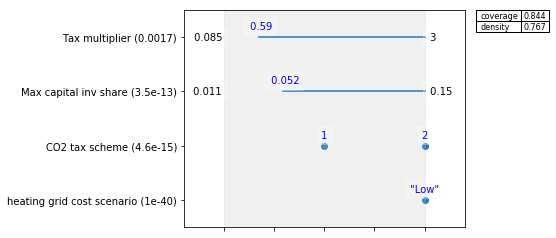

In [60]:
box2.inspect(5)
box2.inspect(5, style='graph')
plt.show()

heating grid cost scenario ['"Low"', '"High"']
CO2 tax scheme [1, 2, 0]


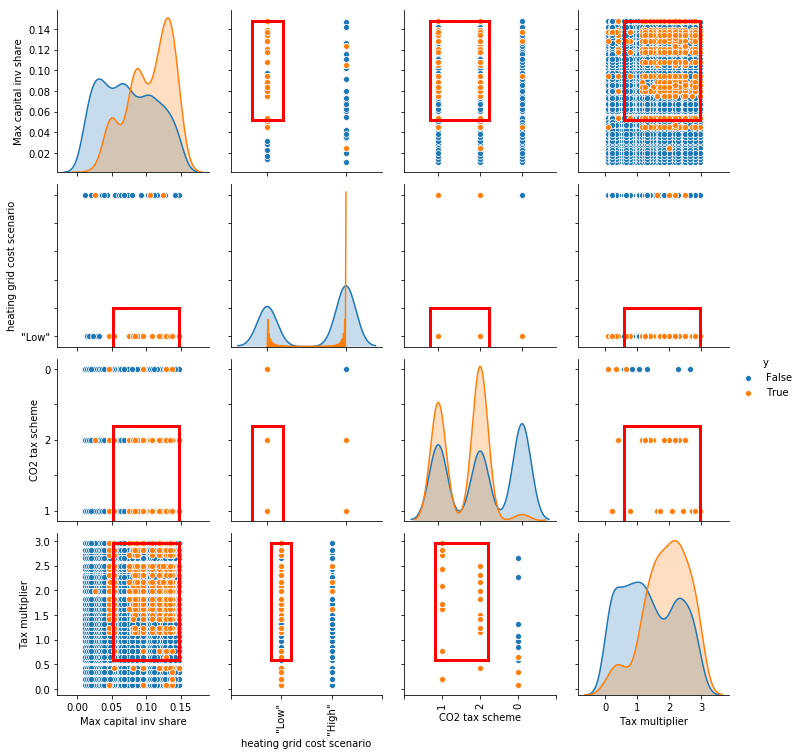

In [61]:
box2.show_pairs_scatter(5)
plt.show()

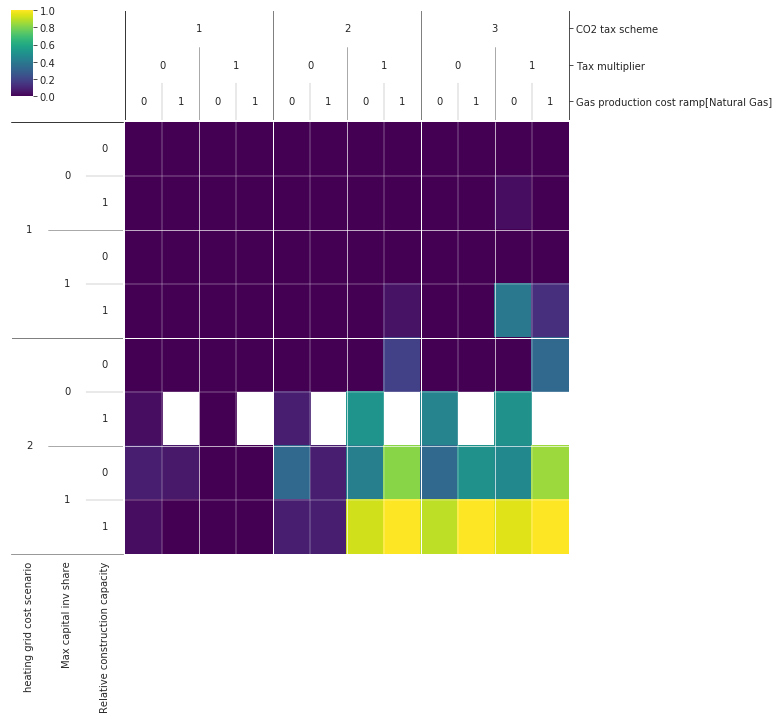

In [62]:
from ema_workbench.analysis import dimensional_stacking

x = inputs
#x = results_clean[0].iloc[:,:25]
#y = Extract_final(results_clean[1]['SD_Cumulative CO2 emissions']) < .65e12
#y = results_clean[0]['cluster cluster'].isin([2,3])
y = Extract_final(results_clean[1]['SD_National Energy System Distribution[Green Gas]']) < 0.55
#y = Extract_final(global_results['SD_National Energy System Distribution[Green Gas]']) <0.6
dimensional_stacking.create_pivot_plot(x, y, nr_levels = 3, nbins=2)
plt.show()

In [63]:
x = inputs
#y = Extract_final(results_clean[1]['SD_Cumulative CO2 emissions']) < 0.6e12
y = Extract_final(results_clean[1]['SD_National Energy System Distribution[Green Gas]']) < 0.55

fs, alg = feature_scoring.get_ex_feature_scores(x, y)
fs.sort_values(ascending=False, by=1)

1
0                                              
heating grid cost scenario             0.190068
CO2 tax scheme                         0.135129
Max capital inv share                  0.094580
Tax multiplier                         0.066968
Relative construction capacity         0.044386
group behaviour                        0.029956
Expected Period                        0.028458
MT investment subsidy                  0.027959
NMTU factor                            0.027336
Heat company ROI                       0.026773
LT investment subsidy                  0.026634
Green Gas investments                  0.026146
insulation subsidy                     0.024650
LT production subsidy                  0.024328
Gas production cost ramp[Natural Gas]  0.024086
Expected Amplitude                     0.023728
Renewable Electricity cost multiplier  0.022823
MT production subsidy                  0.022610
Maximum cost reduction                 0.021456
Grey electricity cost ramp             0.021450
Base Investments Renewable             0.020088
Max income inv share                   0.018906
Gas production cost ramp[Green Gas]    0.017732
Foreign renewable multiplier           0.017229
Green gas transition scheme            0.016522

In [64]:
from ema_workbench.analysis import pairs_plotting

In [65]:
systems_grouped['Cumulative CO2 Emissions'] = results_clean[1]['SD_Cumulative CO2 emissions']

In [66]:
test = (results_clean[0], systems_grouped)
import pickle
a_file = open("test.pkl", "wb")
pickle.dump(test, a_file)
a_file.close()

In [67]:

final = {}
for i in results_clean[1].keys():
    final[i] = results_clean[1][i][:,-1]

In [72]:
pd.DataFrame(final).iloc[:,[3, 4, 5, 6, 7, 8, 9, -2]]

SD_National Energy System Distribution[Natural Gas]  \
0                                              0.006277     
1                                              0.006129     
2                                              0.005258     
3                                              0.004898     
4                                              0.005010     
...                                                 ...     
1493                                           0.008113     
1494                                           0.007935     
1495                                           0.007572     
1496                                           0.006158     
1497                                           0.007312     

      SD_National Energy System Distribution[Green Gas]  \
0                                              0.621421   
1                                              0.606786   
2                                              0.520580   
3                                              0.484887   
4                                              0.495957   
...                                                 ...   
1493                                           0.803169   
1494                                           0.785538   
1495                                           0.749649   
1496                                           0.609636   
1497                                           0.723904   

      SD_National Energy System Distribution[LT Heating Grid]  \
0                                              0.026973         
1                                              0.028549         
2                                              0.095782         
3                                              0.108137         
4                                              0.105205         
...                                                 ...         
1493                                           0.002347         
1494                                           0.001538         
1495                                           0.006884         
1496                                           0.017126         
1497                                           0.004446         

      SD_National Energy System Distribution[MT Heating Grid]  \
0                                              0.055823         
1                                              0.098379         
2                                              0.182228         
3                                              0.122321         
4                                              0.130730         
...                                                 ...         
1493                                           0.001573         
1494                                           0.001468         
1495                                           0.080575         
1496                                           0.189434         
1497                                           0.074851         

      SD_National Energy System Distribution[HT Heating Grid]  \
0                                              0.053030         
1                                              0.049836         
2                                              0.039982         
3                                              0.044657         
4                                              0.042952         
...                                                 ...         
1493                                           0.060091         
1494                                           0.060265         
1495                                           0.052613         
1496                                           0.045504         
1497                                           0.053671         

      SD_National Energy System Distribution[Air Heat Pump]  \
0                                              0.116823       
1                                              0.102355       
2                               

In [73]:
systems_final = pd.DataFrame(final).iloc[:,[3, 4, 5, 6, 7, 8, 9, -2]].sort_values('SD_Cumulative CO2 emissions')

In [74]:
 pd.DataFrame(final).columns

Index(['SD_Average Gas Price', 'SD_Average Electricity Price',
       'SD_Average Heat Price',
       'SD_National Energy System Distribution[Natural Gas]',
       'SD_National Energy System Distribution[Green Gas]',
       'SD_National Energy System Distribution[LT Heating Grid]',
       'SD_National Energy System Distribution[MT Heating Grid]',
       'SD_National Energy System Distribution[HT Heating Grid]',
       'SD_National Energy System Distribution[Air Heat Pump]',
       'SD_National Energy System Distribution[Ground Heat Pump]',
       'SD_Percentage Renewable Electricity', 'SD_CO2 Tax',
       'SD_Gas Trade[Natural Gas]', 'SD_Gas Trade[Green Gas]',
       'SD_Electricity Trade', 'SD_Cumulative CO2 emissions', 'TIME'],
      dtype='object')

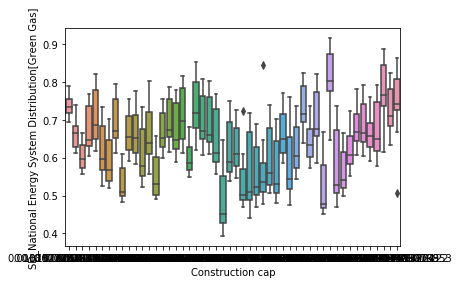

In [75]:
y = pd.DataFrame(final).iloc[:,4]
x = results_clean[0]['ABM_Relative-construction-capacity']
fig = sns.boxplot(x=x, y=y)#, marker = '+', order =25)
fig.set_ylabel(y.name)
fig.set_xlabel('Construction cap')
plt.show()

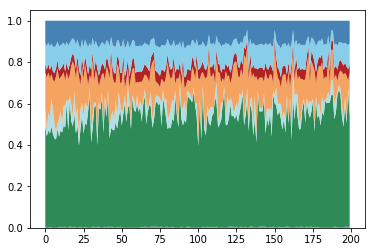

In [76]:
# Data
x=list(systems_final.reset_index(drop=True).index)[0:200]#['SD_Cumulative CO2 emissions']
y=systems_final.iloc[:,:-1].iloc[0:200].transpose()
pal = sns.color_palette("Set3")
pal = ['Grey', 'seagreen', 'powderblue', 'sandybrown', 'firebrick', 'skyblue', 'steelblue'] 
    
# Plot
plt.stackplot(x,y, labels= systems_final.iloc[:,:-1], colors=pal, alpha=1 )
#plt.legend(loc='right')
plt.show()

In [77]:
systems_final['my_bin'] = pd.cut(systems_final['SD_Cumulative CO2 emissions'], bins=10)

In [78]:
stacked_data = systems_final.groupby('my_bin').mean().transpose().iloc[:-1]

In [79]:
def plot_stacked_bar(data, series_labels, category_labels=None, legend = True,
                     show_values=False, value_format="{}", y_label=None, x_label =None, ax = None,
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels , rotation='vertical')

    if y_label:
        plt.ylabel(y_label)
    
    if x_label:
        plt.xlabel(x_label)
    
    if legend:
        plt.legend(bbox_to_anchor=[1, 1], ncol=7)

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

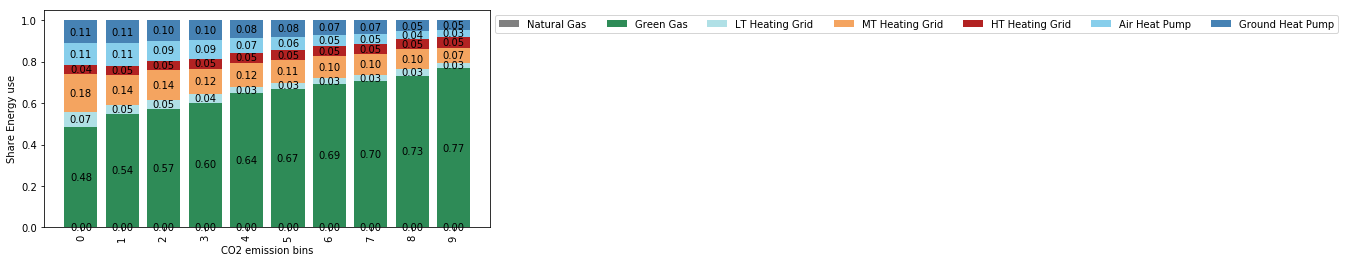

In [80]:

plt.figure(figsize=(8, 4))

series_labels = ['Natural Gas', 'Green Gas', 'LT Heating Grid', 'MT Heating Grid', 'HT Heating Grid', 'Air Heat Pump', 'Ground Heat Pump']

pal = ['Grey', 'seagreen', 'powderblue', 'sandybrown', 'firebrick', 'skyblue', 'steelblue']
data = stacked_data.to_numpy()

category_labels = range(10)

plot_stacked_bar(
    data, 
    series_labels, 
    #legend = legend,
    category_labels=category_labels, 
    grid = False,
    show_values=True, 
    value_format="{:.2f}",
    colors=pal,
    y_label="Share Energy use",
    x_label="CO2 emission bins",
    legend = True
    
)

plt.savefig('bar.png')
plt.show()

In [81]:
policy_outcome = pd.DataFrame(final).merge(results[0], left_index = True, right_index = True)
policy_outcome.columns = policy_outcome.columns.str.strip('ABM').str.strip('SD').str.strip('_').str.replace('-', ' ')

In [82]:
for i in policy_outcome[policy_outcome.columns[policy_outcome.dtypes == float]].iloc[:,16:].columns:
    policy_outcome[i + ' bin'] = pd.cut(policy_outcome[i], bins=5)

In [83]:
policy_outcome.groupby(by= 'ABM_Heat-company-ROI_bin').mean().iloc[:,[3,4,5,6,7,8,9]].transpose()

KeyError: 'ABM_Heat-company-ROI_bin'

In [84]:
def plot_stacked_energy_system_share(input_data, group, legend = True):


    plt.figure(figsize=(8, 4))

    series_labels = ['Natural Gas', 'Green Gas', 'LT Heating Grid', 'MT Heating Grid', 'HT Heating Grid', 'Air Heat Pump', 'Ground Heat Pump']

    pal = ['Grey', 'seagreen', 'powderblue', 'sandybrown', 'firebrick', 'skyblue', 'steelblue']
    #group = 'ABM_Heat-company-ROI_bin'
    data = input_data.groupby(by= group).mean().iloc[:,[3,4,5,6,7,8,9]].transpose().to_numpy()

    category_labels = range(5)#policy_outcome[group].unique().sort_values()

    return plot_stacked_bar(
        data, 
        series_labels, 
        category_labels=category_labels, 
        grid = False,
        show_values=True, 
        legend=legend,
        value_format="{:.2f}",
        colors=pal,
        y_label="Share Energy use",
        x_label=group,
        
    )
    
plt.show()

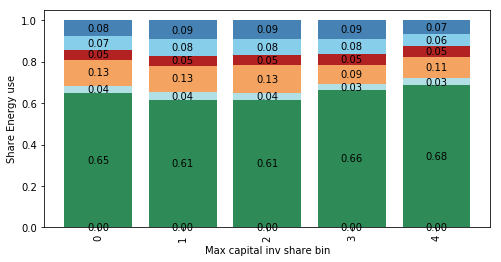

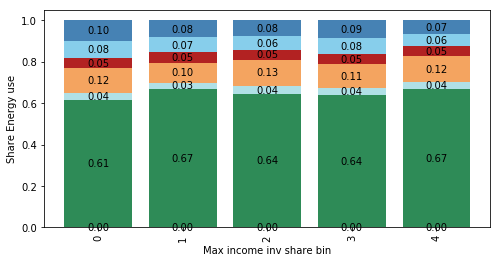

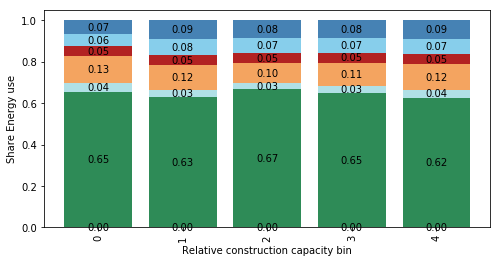

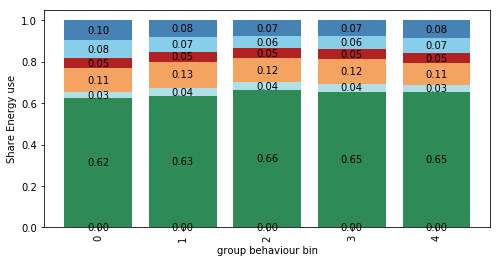

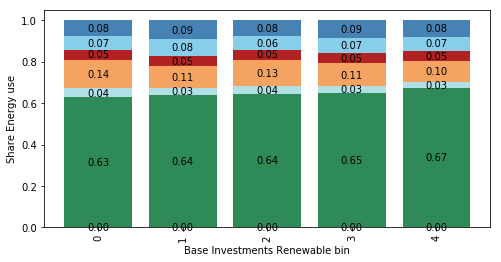

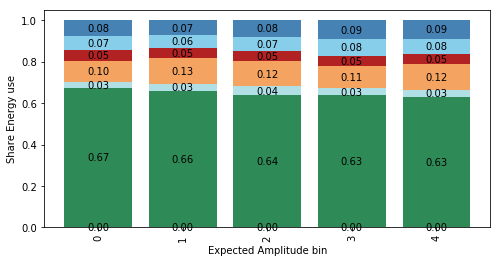

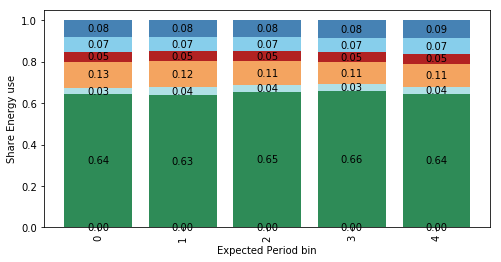

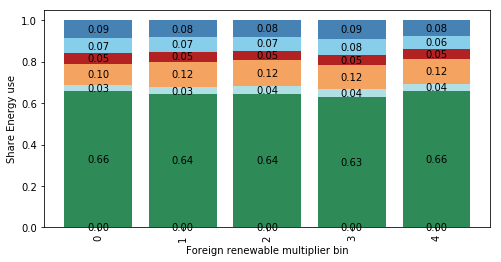

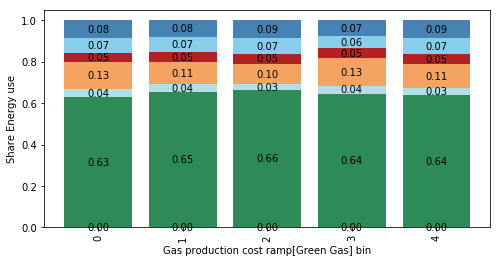

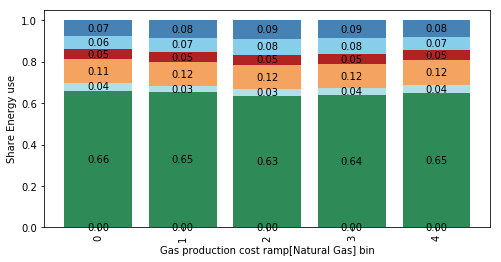

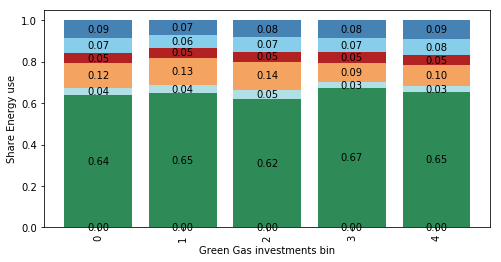

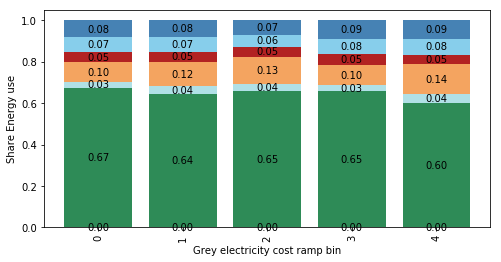

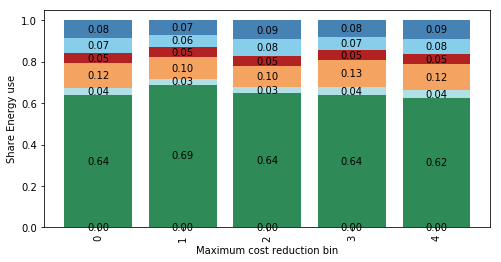

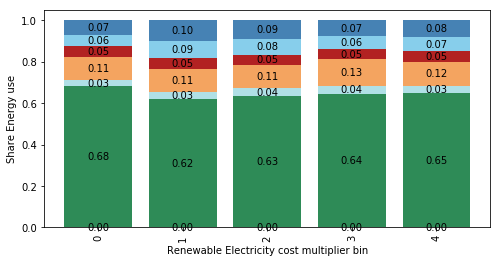

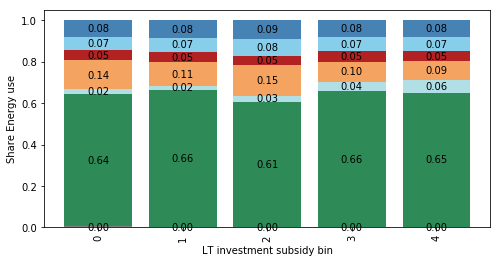

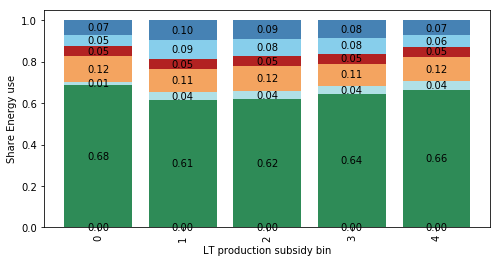

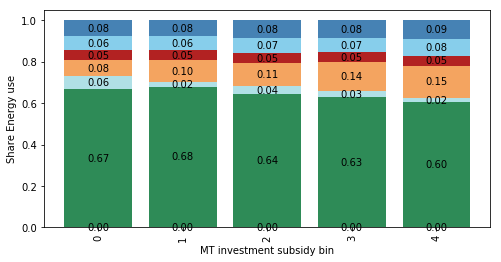

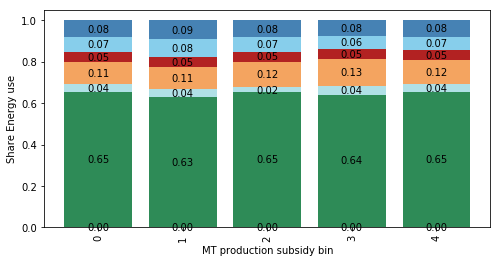

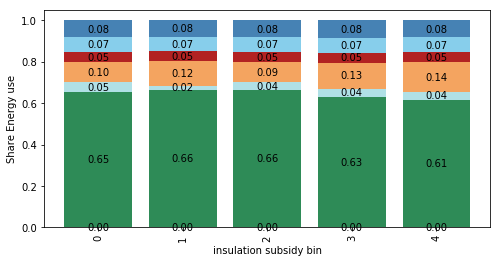

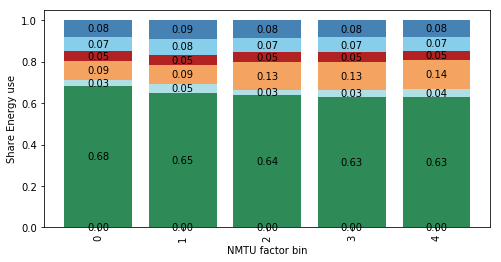

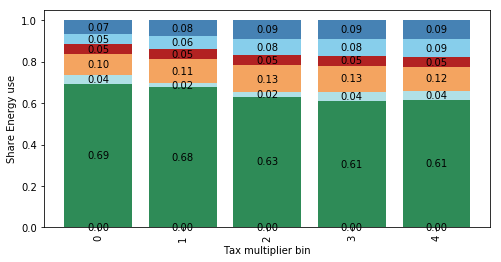

In [88]:
for i in policy_outcome.columns[-21:]:
    plot_stacked_energy_system_share(policy_outcome,i, legend = False)

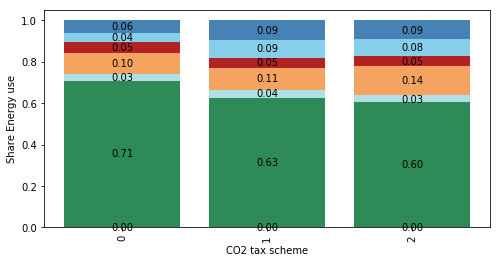

In [89]:
plot_stacked_energy_system_share(policy_outcome,'CO2 tax scheme', legend = False)

In [131]:
policy_outcome['CO2 tax scheme'] = policy_outcome['CO2 tax scheme'].astype('category').cat.set_categories([0,1,2],ordered= True)

In [91]:
test2 = {}
for i in test[1].keys():
    test2[i] = test[1][i][:,-1] 
test2 = pd.DataFrame(test2)
test2['CO2 goal'] = test[0]['CO2 goal'] == 'Low'


In [92]:
test2

Gas Connections  Heating Grids  Heat Pumps  Renewable Electricity  \
0            0.627698       0.135827    0.236475               0.998806   
1            0.612915       0.176763    0.210322               0.989252   
2            0.525838       0.317991    0.156171               0.821096   
3            0.489785       0.275115    0.235100               0.973866   
4            0.500967       0.278888    0.220146               0.946480   
...               ...            ...         ...                    ...   
1493         0.811282       0.064011    0.124707               0.892781   
1494         0.793472       0.063270    0.143257               0.731596   
1495         0.757222       0.140072    0.102706               0.976604   
1496         0.615794       0.252064    0.132142               0.948090   
1497         0.731216       0.132968    0.135816               0.315206   

        TIME  Cumulative CO2 Emissions  CO2 goal  
0     2060.0              5.052442e+11      True  
1     2060.0              4.548886e+11      True  
2     2060.0              6.418874e+11      True  
3     2060.0              4.973375e+11      True  
4     2060.0              4.882180e+11      True  
...      ...                       ...       ...  
1493  2060.0              7.598469e+11     False  
1494  2060.0              8.243403e+11     False  
1495  2060.0              6.758612e+11      True  
1496  2060.0              6.735438e+11      True  
1497  2060.0              8.883584e+11     False  

[1498 rows x 7 columns]

C:\Users\Dirk\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Dirk\Anaconda3\lib\site-packages\matplotlib\contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Dirk\Anaconda3\lib\site-packages\matplotlib\contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Dirk\Anaconda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\Dirk\Anaconda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\Dirk\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels

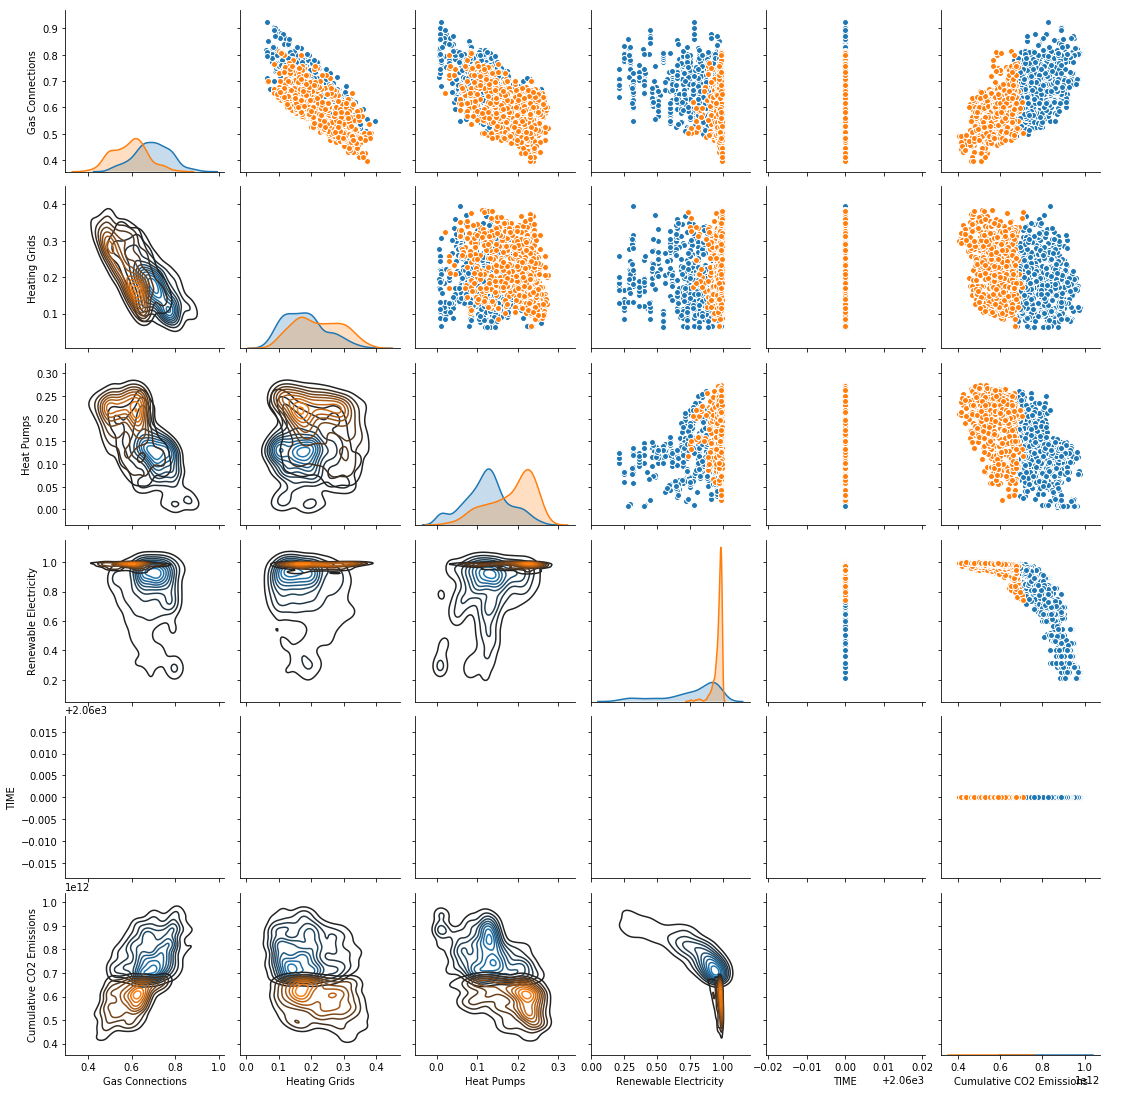

In [93]:
g = sns.PairGrid(test2,hue='CO2 goal')
g.map_upper(plt.scatter, edgecolor="w")
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot,  shade=True, lw=1.5)
#g.add_legend()

In [94]:
systems_grouped['Gas Connections'][:,-1]

array([0.62769848, 0.6129148 , 0.52583828, ..., 0.75722151, 0.61579413,
       0.73121629])

In [95]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

In [96]:
system_distribution_data = results[1]['System Distributions'][~np.isnan(global_results['SD_Average Gas Price']).any(axis = 1)]

In [97]:
system_dict = {}
system_dict['System Distributions'] = system_distribution_data

In [98]:
from ema_workbench import save_results

In [99]:
# save_results((results_clean[0],system_dict), 'System Distributions.gz.tar')

In [100]:
results_clean[0]['Scenario CO2 low'] == True

0        True
1        True
2       False
3        True
4        True
        ...  
1493    False
1494    False
1495    False
1496    False
1497    False
Name: Scenario CO2 low, Length: 1498, dtype: bool

In [101]:
system_distribution_data.shape

(1498, 2840, 41)

In [102]:
Low_scen_desc = results_clean[0][results_clean[0]['Scenario CO2 low'] == True].describe().drop(['count','25%', '50%', '75%']).transpose()

In [103]:
results_clean[0]

ABM_Heat-company-ROI  ABM_Max-capital-inv-share  \
0                 0.137160                   0.069719   
1                 0.062128                   0.102039   
2                 0.064186                   0.045544   
3                 0.127939                   0.120970   
4                 0.112654                   0.080256   
...                    ...                        ...   
1493              0.141684                   0.073563   
1494              0.139523                   0.067502   
1495              0.122250                   0.086174   
1496              0.054213                   0.094968   
1497              0.032264                   0.079638   

      ABM_Max-income-inv-share  ABM_Relative-construction-capacity  \
0                     0.137245                            0.047283   
1                     0.036129                            0.069331   
2                     0.033345                            0.085324   
3                     0.100692                            0.070322   
4                     0.119781                            0.066683   
...                        ...                                 ...   
1493                  0.067290                            0.048473   
1494                  0.102829                            0.037726   
1495                  0.026246                            0.054436   
1496                  0.098449                            0.057664   
1497                  0.047233                            0.085909   

      ABM_group-behaviour ABM_heating-grid-cost-scenario  \
0                0.499179                         "High"   
1                0.107199                         "High"   
2                0.267829                          "Low"   
3                0.624889                          "Low"   
4                0.846891                          "Low"   
...                   ...                            ...   
1493             0.571133                         "High"   
1494             0.779493                         "High"   
1495             0.293478                          "Low"   
1496             0.463579                          "Low"   
1497             0.798667                         "High"   

      SD_Base Investments Renewable  SD_Expected Amplitude  \
0                          0.052367               0.010766   
1                          0.101651               0.046696   
2                          0.033199               0.048046   
3                          0.059333               0.039061   
4                          0.104178               0.048446   
...                             ...                    ...   
1493                       0.079585               0.021174   
1494                       0.068916               0.032619   
1495                       0.111380               0.045565   
1496                       0.090362               0.014600   
1497                       0.032138               0.037910   

      SD_Expected Period  SD_Foreign renewable multiplier  ...  MT cluster  \
0               6.502617                         0.520070  ...           0   
1               7.843181                         0.714493  ...           0   
2               6.214144                         1.700626  ...           2   
3               7.077304                         1.007715  ...           2   
4               4.501719                         1.382993  ...           2   
...                  ...                              ...  ...         ...   
1493            6.792231                         1.152620  ...           3   
1494            8.854697                         1.290761  ...           3   
1495            4.708249                         0.936294  ...           0   
1496            9.405961                         0.563824  ...           2   
1497            5.625396                         1.616193  ...           0   

      LT cluster  CO2 cluster  CO2 goal  hp cluster  hg cluster  \
0         

In [104]:
Low_scen_desc['CV'] = Low_scen_desc['std'] / Low_scen_desc['mean']

In [105]:
Low_scen_desc[Low_scen_desc['CV'] < 0.3].drop('SD_Green Gas investments')

mean       std       min       max  \
ABM_Relative-construction-capacity  0.059026  0.016405  0.015131  0.093339   
SD_Base Investments Renewable       0.098527  0.019743  0.046707  0.123991   
SD_Expected Period                  7.149385  1.798017  4.041938  9.669447   
SD_NMTU factor                      1.568456  0.261698  1.032919  1.974670   
SD_Tax multiplier                   2.324170  0.531519  0.417104  2.955802   

                                          CV  
ABM_Relative-construction-capacity  0.277938  
SD_Base Investments Renewable       0.200378  
SD_Expected Period                  0.251493  
SD_NMTU factor                      0.166851  
SD_Tax multiplier                   0.228692

In [106]:
results_clean[1]['SD_Cumulative CO2 emissions'][:,-1]

array([5.0524422e+11, 4.5488862e+11, 6.4188744e+11, ..., 6.7586123e+11,
       6.7354380e+11, 8.8835840e+11])

In [107]:
policy_eval = results_clean[0]
policy_eval['Cumulative CO2 emissions'] = results_clean[1]['SD_Cumulative CO2 emissions'][:,-1]

In [108]:
policy_eval = policy_eval.sort_values('Cumulative CO2 emissions').reset_index(drop = True)

In [109]:
out= policy_eval.iloc[:,-2:]
exp = policy_eval[policy_eval.columns[policy_eval.dtypes == float]]

In [110]:
exp.columns

Index(['ABM_Heat-company-ROI', 'ABM_Max-capital-inv-share',
       'ABM_Max-income-inv-share', 'ABM_Relative-construction-capacity',
       'ABM_group-behaviour', 'SD_Base Investments Renewable',
       'SD_Expected Amplitude', 'SD_Expected Period',
       'SD_Foreign renewable multiplier',
       'SD_Gas production cost ramp[Green Gas]',
       'SD_Gas production cost ramp[Natural Gas]', 'SD_Green Gas investments',
       'SD_Grey electricity cost ramp', 'SD_Maximum cost reduction',
       'SD_Renewable Electricity cost multiplier', 'ABM_LT-investment-subsidy',
       'ABM_LT-production-subsidy', 'ABM_MT-investment-subsidy',
       'ABM_MT-production-subsidy', 'ABM_insulation-subsidy', 'SD_NMTU factor',
       'SD_Tax multiplier', 'Cumulative CO2 emissions'],
      dtype='object')

In [111]:
exp.iloc[:,-8:-6]

ABM_LT-investment-subsidy  ABM_LT-production-subsidy
0                      0.454161                   0.103737
1                      0.387983                   0.126711
2                      0.162388                   0.236161
3                      0.454161                   0.103737
4                      0.367745                   0.372652
...                         ...                        ...
1493                   0.495766                   0.393891
1494                   0.318641                   0.266540
1495                   0.430620                   0.080726
1496                   0.338179                   0.302075
1497                   0.318641                   0.266540

[1498 rows x 2 columns]

In [112]:
mun_systems0 = pd.DataFrame(system_distribution_data.std(axis = 0))
mun_systems1 = pd.DataFrame(system_distribution_data.mean(axis = 0))
mun_systems2 = pd.DataFrame(system_distribution_data[results_clean[0]['Scenario CO2 low'] == True].mean(axis = 0))
mun_systems3 = pd.DataFrame(system_distribution_data[results_clean[0]['Scenario CO2 high'] == True].mean(axis = 0))
#mun_systems_std= pd.DataFrame(test.var(axis = 0))

In [113]:
system_distribution_data[results_clean[0]['Scenario CO2 low'] == True].shape

(154, 2840, 41)

In [114]:
system_distribution_data[results_clean[0]['Scenario CO2 high'] == True].shape

(318, 2840, 41)

In [115]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

C:\Users\Dirk\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [116]:
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2019_gegeneraliseerd&outputFormat=json'
municipalities  = gpd.read_file(geodata_url)

In [117]:
municipalities.statnaam = municipalities.statnaam.str.replace('â', 'a').str.replace('ú','u')

In [118]:
muns = np.array(municipalities.statnaam)
muns.sort()

In [119]:
arrays = [muns,np.array(["Natural Gas", "Green Gas", "LT Heating Grid", "MT Heating Grid", "HT Heating Grid", "Air Heat Pump", "Ground Heat Pump", "Hybrid Heat Pump"])]

In [120]:
index = pd.MultiIndex.from_product(arrays, names=['Municipality', 'Energy System'])

In [121]:
mun_systems = mun_systems2.transpose()

In [122]:
mun_systems.columns = index

In [123]:
municipalities_GG = municipalities.merge(mun_systems.xs('Green Gas',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_MT = municipalities.merge(mun_systems.xs('MT Heating Grid',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_HPA = municipalities.merge(mun_systems.xs('Air Heat Pump',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_HPG = municipalities.merge(mun_systems.xs('Ground Heat Pump',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_LT = municipalities.merge(mun_systems.xs('LT Heating Grid',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_HT = municipalities.merge(mun_systems.xs('HT Heating Grid',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_NG = municipalities.merge(mun_systems.xs('Natural Gas',axis = 1, level=1, drop_level=True).transpose(), left_on = 'statnaam', right_index = True)
municipalities_HG = municipalities_GG.iloc[:,:6].merge(municipalities_MT.iloc[:,6:47] + municipalities_HT.iloc[:,6:47] + municipalities_LT.iloc[:,6:47],left_index = True, right_index = True)
municipalities_HP = municipalities_GG.iloc[:,:6].merge(municipalities_HPA.iloc[:,6:47] + municipalities_HPG.iloc[:,6:47],left_index = True, right_index = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\Dirk\Anaconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\Dirk\Anaconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\Dirk\Anaconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\Dirk\Anaconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
C:\Users\Dirk\Anaconda3\lib\site-packages\geopandas\plotting.py:335: UserWarning: The GeoSeries you are attempting to pl

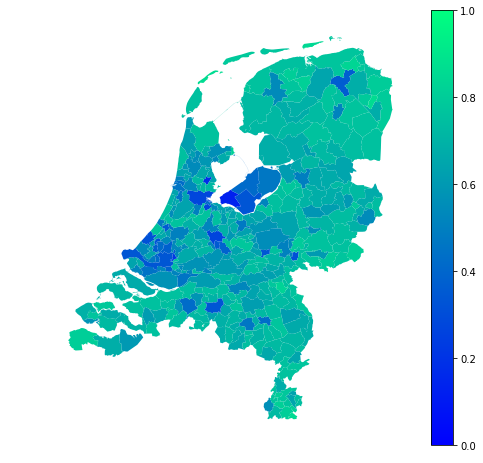

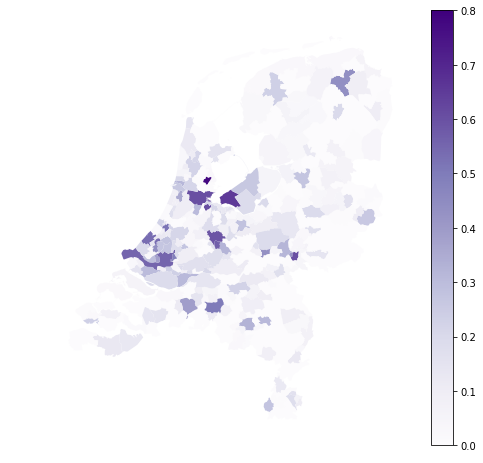

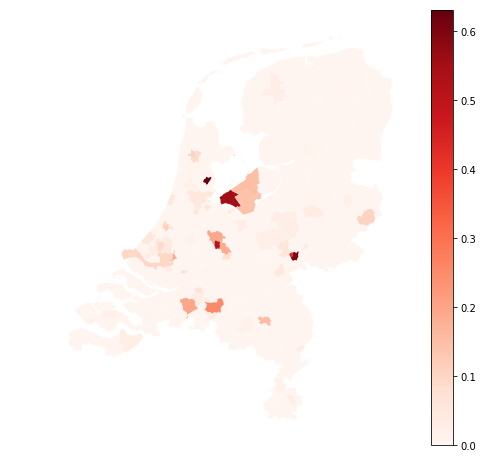

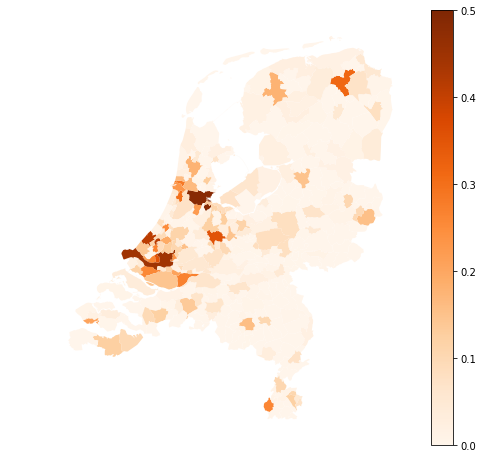

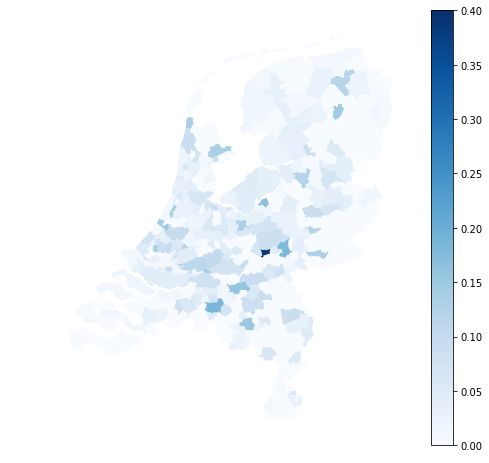

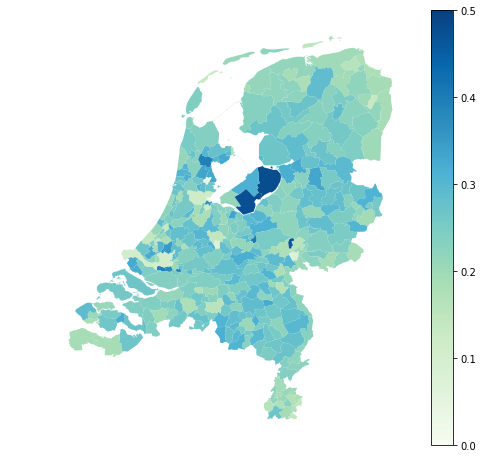

In [124]:
city = 'Municipalities'
year = 2060
data = 40

#show_map = mun_systems.loc[year,:]
#show_map = show_map.where(map_data.Year == year).dropna(how = 'all')

from mpl_toolkits.axes_grid1 import make_axes_locatable
#fig, ax = plt.subplots(1, 1)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
GG = municipalities_GG.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'}, vmax = 1, vmin= 0 , figsize = (8,8),cmap='winter', legend = True)#
HG = municipalities_HG.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'}, vmax = 0.8, vmin= 0, figsize = (8,8),cmap='Purples', legend = True)#
HT = municipalities_HT.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} , figsize = (8,8),cmap='Reds', legend = True)#
MT = municipalities_MT.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} ,vmax = 0.5, vmin = 0, figsize = (8,8),cmap='Oranges', legend = True)#
LT = municipalities_LT.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} ,vmax = 0.4, vmin = 0, figsize = (8,8),cmap='Blues', legend = True)#
HP = municipalities_HP.plot(column=year - 2020, missing_kwds={'color': 'lightgrey'} , vmax = 0.5, vmin = 0, figsize = (8,8),cmap='GnBu', legend = True)#


for i in [GG, HG, HT, MT, LT, HP]:
    i.axis('off')
#s.axis('off')
#p.set_title(f'{data}, {city}, {year}')





In [125]:
input_data = pd.read_csv('total_kwb.csv').groupby(by = 'gemeente').mean().merge(municipalities_HP[['statnaam', 40]], left_index = True, right_on = 'statnaam').set_index('statnaam')

In [126]:
input_data.columns

Index([                              'total',
                                     'g_woz',
                                   'p_koopw',
                                  'p_wcorpw',
                                   'p_ov_hw',
                                  'a_opp_ha',
                                  'a_lan_ha',
                                  'a_wat_ha',
                                   'p_hh_li',
                                   'p_hh_hi',
                                  'p_stadsv',
                  'Centroid in WKO-contour?',
               'Potentie WKO per buurt (GJ)',
       'Potentie bodemlussen per buurt (GJ)',
                                     'P-WKO',
                                     'P-GHP',
                                    'P-TESW',
                                  'g_ink_pi',
                             'Aansluitingen',
                         'Aansluit_lengte_m',
                     'Hoofdleiding_lengte_m',
                                  

In [127]:
input_data = input_data.rename(columns = {40:'p_HP'})

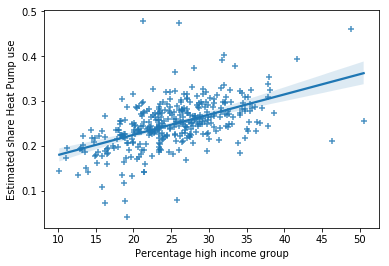

In [128]:
x = input_data['p_hh_hi']
y = input_data['p_HP']
fig = sns.regplot(x=x, y=y,marker = '+')
fig.set_ylabel('Estimated share Heat Pump use')
fig.set_xlabel('Percentage high income group')
plt.show()

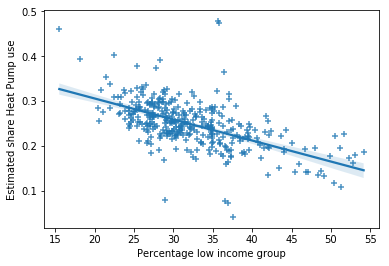

In [129]:
x = input_data['p_hh_li']
y = input_data['p_HP']
fig = sns.regplot(x=x, y=y,marker = '+')
fig.set_ylabel('Estimated share Heat Pump use')
fig.set_xlabel('Percentage low income group')
plt.show()

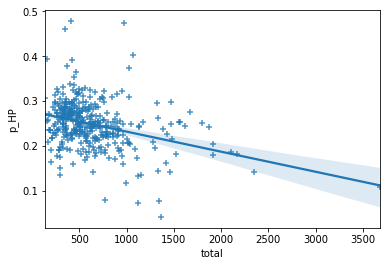

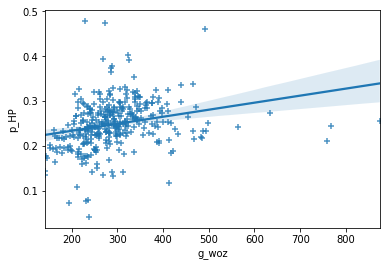

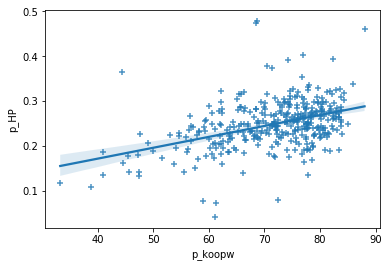

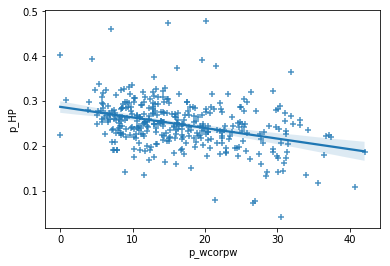

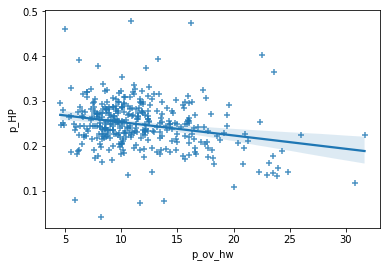

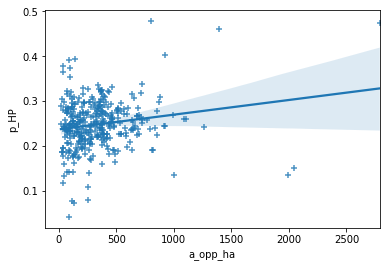

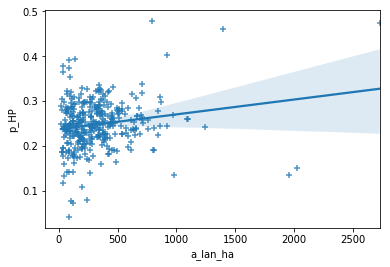

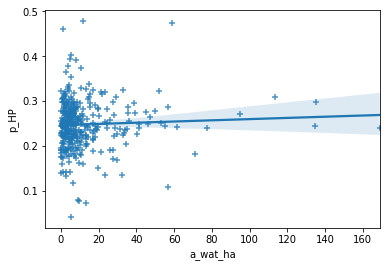

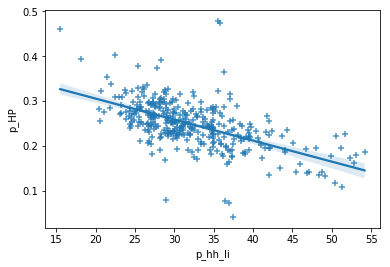

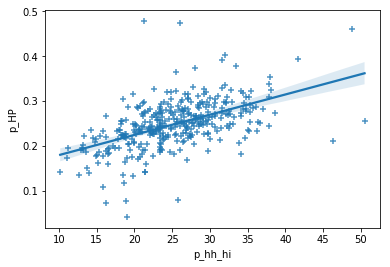

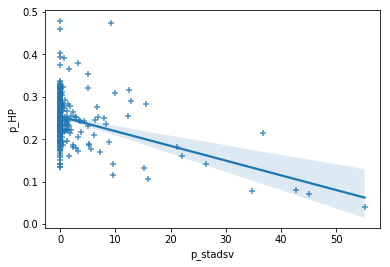

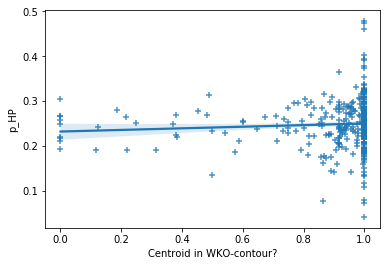

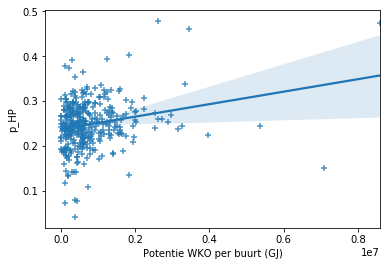

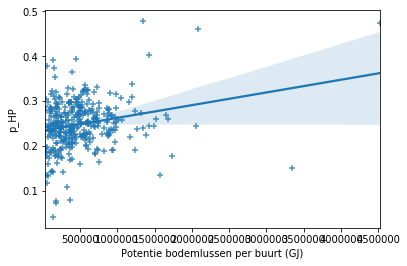

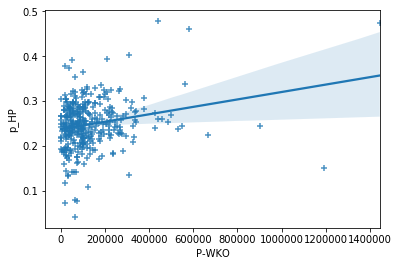

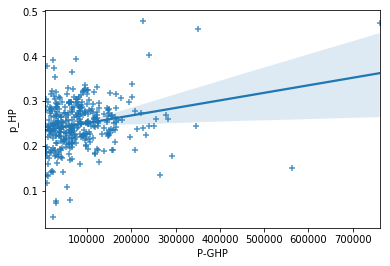

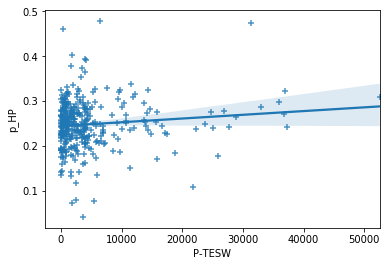

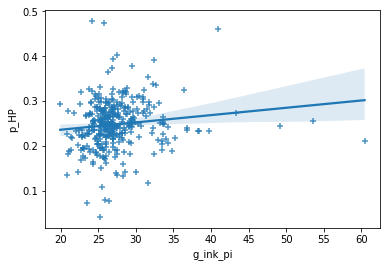

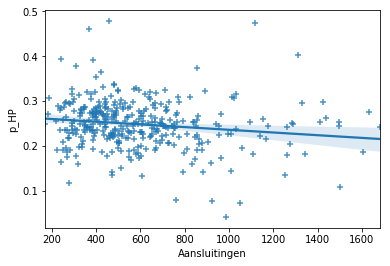

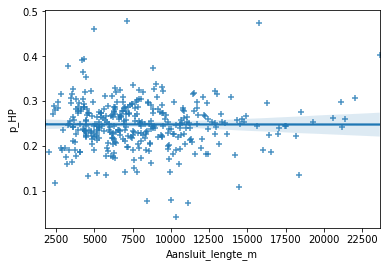

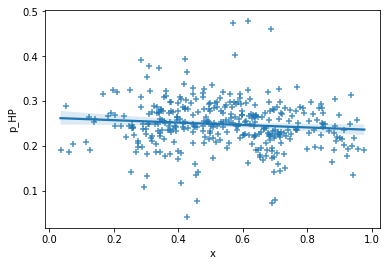

In [130]:
for i in input_data.columns[:-1]:
    x = input_data[i]
    y = input_data['p_HP']
    fig = sns.regplot(x=x, y=y,marker = '+')
    plt.show()